In [171]:
# All Dependencies And libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
# Setting The format of The Big Integer Values for Better Understanding
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")

In [172]:
# Creating Dataframe 
df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [173]:
# Shape of The Dataset
print("Total No of Column : ",df.shape[1])
print("Total No of rows   : ",df.shape[0])
print("Shape of Dataset   : ",df.shape)


Total No of Column :  11
Total No of rows   :  3755
Shape of Dataset   :  (3755, 11)


In [174]:
# Checking For The is any Null value Present in Dataset
# We have Data points with Datatypes Objects and Integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [175]:
# Getting The Number of Unique Categories in our Dataframe 
for i in df.columns:
    if df[i].dtype == "O":
        print("Number of categories in {}: ".format(i),df[i].nunique())
        print("\n",df[i].unique())

        print("-------------------------------------------------------------\n")
    

Number of categories in experience_level:  4

 ['SE' 'MI' 'EN' 'EX']
-------------------------------------------------------------

Number of categories in employment_type:  4

 ['FT' 'CT' 'FL' 'PT']
-------------------------------------------------------------

Number of categories in job_title:  93

 ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 '

In [176]:
# We have Categories With Their Shortforms present in Dataset
# Making all Shortforms into their Original full Forms for Better Understanding
# for these first Making The dictionaries with full forms and short forms and then applying with string methods 

# Define the currency code to long-form mapping
currency_long_form = {
    'EUR': 'Euro',
    'USD': 'United States Dollar',
    'INR': 'Indian Rupee',
    'HKD': 'Hong Kong Dollar',
    'CHF': 'Swiss Franc',
    'GBP': 'British Pound Sterling',
    'AUD': 'Australian Dollar',
    'SGD': 'Singapore Dollar',
    'CAD': 'Canadian Dollar',
    'ILS': 'Israeli New Shekel',
    'BRL': 'Brazilian Real',
    'THB': 'Thai Baht',
    'PLN': 'Polish Złoty',
    'HUF': 'Hungarian Forint',
    'CZK': 'Czech Koruna',
    'DKK': 'Danish Krone',
    'JPY': 'Japanese Yen',
    'MXN': 'Mexican Peso',
    'TRY': 'Turkish Lira',
    'CLP': 'Chilean Peso'
}

# Define the location code to long-form mapping
location_long_form = {
    'ES': 'Spain',
    'US': 'United States',
    'CA': 'Canada',
    'DE': 'Germany',
    'GB': 'United Kingdom',
    'NG': 'Nigeria',
    'IN': 'India',
    'HK': 'Hong Kong',
    'NL': 'Netherlands',
    'CH': 'Switzerland',
    'CF': 'Central African Republic',
    'FR': 'France',
    'FI': 'Finland',
    'UA': 'Ukraine',
    'IE': 'Ireland',
    'IL': 'Israel',
    'GH': 'Ghana',
    'CO': 'Colombia',
    'SG': 'Singapore',
    'AU': 'Australia',
    'SE': 'Sweden',
    'SI': 'Slovenia',
    'MX': 'Mexico',
    'BR': 'Brazil',
    'PT': 'Portugal',
    'RU': 'Russia',
    'TH': 'Thailand',
    'HR': 'Croatia',
    'VN': 'Vietnam',
    'EE': 'Estonia',
    'AM': 'Armenia',
    'BA': 'Bosnia and Herzegovina',
    'KE': 'Kenya',
    'GR': 'Greece',
    'MK': 'North Macedonia',
    'LV': 'Latvia',
    'RO': 'Romania',
    'PK': 'Pakistan',
    'IT': 'Italy',
    'MA': 'Morocco',
    'PL': 'Poland',
    'AL': 'Albania',
    'AR': 'Argentina',
    'LT': 'Lithuania',
    'AS': 'American Samoa',
    'CR': 'Costa Rica',
    'IR': 'Iran',
    'BS': 'The Bahamas',
    'HU': 'Hungary',
    'AT': 'Austria',
    'SK': 'Slovakia',
    'CZ': 'Czech Republic',
    'TR': 'Turkey',
    'PR': 'Puerto Rico',
    'DK': 'Denmark',
    'BO': 'Bolivia',
    'PH': 'Philippines',
    'BE': 'Belgium',
    'ID': 'Indonesia',
    'EG': 'Egypt',
    'AE': 'United Arab Emirates',
    'LU': 'Luxembourg',
    'MY': 'Malaysia',
    'HN': 'Honduras',
    'JP': 'Japan',
    'DZ': 'Algeria',
    'IQ': 'Iraq',
    'CN': 'China',
    'NZ': 'New Zealand',
    'CL': 'Chile',
    'MD': 'Moldova',
    'MT': 'Malta'
}

# Define the residence code to long-form mapping
employee_residence_long_form = {
    'ES': 'Spain',
    'US': 'United States',
    'CA': 'Canada',
    'DE': 'Germany',
    'GB': 'United Kingdom',
    'NG': 'Nigeria',
    'IN': 'India',
    'HK': 'Hong Kong',
    'PT': 'Portugal',
    'NL': 'Netherlands',
    'CH': 'Switzerland',
    'CF': 'Central African Republic',
    'FR': 'France',
    'AU': 'Australia',
    'FI': 'Finland',
    'UA': 'Ukraine',
    'IE': 'Ireland',
    'IL': 'Israel',
    'GH': 'Ghana',
    'AT': 'Austria',
    'CO': 'Colombia',
    'SG': 'Singapore',
    'SE': 'Sweden',
    'SI': 'Slovenia',
    'MX': 'Mexico',
    'UZ': 'Uzbekistan',
    'BR': 'Brazil',
    'TH': 'Thailand',
    'HR': 'Croatia',
    'PL': 'Poland',
    'KW': 'Kuwait',
    'VN': 'Vietnam',
    'CY': 'Cyprus',
    'AR': 'Argentina',
    'AM': 'Armenia',
    'BA': 'Bosnia and Herzegovina',
    'KE': 'Kenya',
    'GR': 'Greece',
    'MK': 'North Macedonia',
    'LV': 'Latvia',
    'RO': 'Romania',
    'PK': 'Pakistan',
    'IT': 'Italy',
    'MA': 'Morocco',
    'LT': 'Lithuania',
    'BE': 'Belgium',
    'AS': 'American Samoa',
    'IR': 'Iran',
    'HU': 'Hungary',
    'SK': 'Slovakia',
    'CN': 'China',
    'CZ': 'Czech Republic',
    'CR': 'Costa Rica',
    'TR': 'Turkey',
    'CLP': 'Chile',
    'DK': 'Denmark',
    'BO': 'Bolivia',
    'PH': 'Philippines',
    'DO': 'Dominican Republic',
    'EG': 'Egypt',
    'ID': 'Indonesia',
    'AE': 'United Arab Emirates',
    'MY': 'Malaysia',
    'JP': 'Japan',
    'EE': 'Estonia',
    'HN': 'Honduras',
    'TN': 'Tunisia',
    'RU': 'Russia',
    'DZ': 'Algeria',
    'IQ': 'Iraq',
    'BG': 'Bulgaria',
    'JE': 'Jersey',
    'RS': 'Serbia',
    'NZ': 'New Zealand',
    'MD': 'Moldova',
    'LU': 'Luxembourg',
    'MT': 'Malta'
}

# Define the experience level code to long-form mapping
experience_level_long_form = {
    'SE': 'Senior-Experienced',
    'MI': 'Mid-Level',
    'EN': 'Entry-Level',
    'EX': 'Executive-Level'
}

# Define the employment type code to full-form mapping
employment_type_long_form = {
    'FT': 'Full-Time',
    'CT': 'Contract',
    'FL': 'Frelancer',
    'PT': 'Part-Time'
}

# Converting The All Values in their Long Form 
df["experience_level"] = df["experience_level"].replace(experience_level_long_form)

df["employment_type"] = df["employment_type"].replace(employment_type_long_form)

df["employee_residence"] = df["employee_residence"].replace(employee_residence_long_form)

df["company_location"] = df["company_location"].replace(location_long_form)

df["salary_currency"] = df["salary_currency"].replace(currency_long_form)

In [177]:
# Creating The copy of Dataset 
df_data_sci = df.copy()

In [178]:
print(df[df["company_location"] != df["employee_residence"]].shape)
# Checking for how much emplyee have their the company location and employee residence or home country are not same.
# There are 101 employees residence is different from their job location 
df[df["company_location"] != df["employee_residence"]][["job_title","company_location","employee_residence"]]
# This Employees list are shown below with their job profile and their home country and thir company location 

(101, 11)


,job_title,company_location,employee_residence
81,Machine Learning Engineer,United States,Portugal
82,Applied Machine Learning Engineer,Germany,India
183,Staff Data Analyst,Canada,Nigeria
218,Applied Data Scientist,Finland,Australia
249,Data Scientist,United Kingdom,Spain
604,Data Scientist,Germany,Austria
736,AI Programmer,Australia,India
856,Software Data Engineer,Australia,Nigeria
857,Data Analyst,United States,Uzbekistan
974,Data Science Manager,Russia,Uzbekistan


In [179]:
# So we drom The Employee_residence which is not much necessory column
df.drop(columns=["employee_residence","salary",],inplace=True)

In [180]:
# We Have The Job Title With same Role but some different name So we analyse the Roles and Merge Them into a Standard Important And industry Known Role 
df["job_title"] = df["job_title"].replace({"Staff Data Scientist": "Data Scientist",
                        "Finance Data Analyst" : "Data Analyst",
                        "Product Data Scientist": "Data Scientist",
                        "Compliance Data Analyst":"Data Analyst",
                         "Marketing Data Engineer":"Data Engineer",
                        "Insight Analyst": "Data Analyst",
                        "Azure Data Engineer":"Data Engineer",
                        "Manager Data Management": "Data Engineer",
                        "Principal Machine Learning Engineer":"Machine Learning Engineer",
                        "Data Management Specialist":"Data Scientist",
                        "Staff Data Analyst":"Data Analyst",
                        "Staff Data Scientist":"Data Scientist",
                        "Product Data Scientist": "Data Scientist",
                        "Head of Machine Learning":"Machine Learning Engineer",
                        "Data Strategist": "Data Scientist",
                        "Applied Machine Learning Engineer":"Machine Learning Engineer",
                        "Insight Analyst":"Data Analyst",
                        "Principal Data Engineer":"Data Engineer",
                        "Principal Data Analyst":"Data Analyst",
                        "Marketing Data Analyst":"Data Analyst",
                        "Financial Data Analyst":"Data Analyst",
                        "Lead Machine Learning Engineer":"Machine Learning Engineer",
                        "Machine Learning Research Engineer":"Machine Learning Engineer",
                        "Data Operations Analyst":"Data Analyst",
                        "Product Data Analyst": "Data Analyst",
                        "Data Science Engineer":"Data Engineer",
                        "Machine Learning Manager":"Data Engineer",
                        "Data Scientist Lead":"Data Scientist",
                        "Data Modeler":"Data Scientist",
                        "Machine Learning Developer":"Machine Learning Engineer",
                        "Lead Data Engineer":"Data Engineer",
                        "Data Quality Analyst":"Data Analyst",
                        "Data Infrastructure Engineer":"Data Engineer",
                        "Principal Data Scientist":"Data Scientist",
                        "Lead Data Scientist":"Data Scientist",
                        "Data Operations Engineer":"Data Engineer",
                        "AI Programmer":"AI Developer",
                        "Applied Data Scientist":"Data Scientist",
                        "BI Data Engineer":"Data Engineer",
                        "Data Specialist": "Data Scientist",
                        "Power BI Developer":"BI Developer",
                        "ML Engineer":"Machine Learning Engineer",
                        "Machine Learning Software Engineer":"Machine Learning Engineer",
                        "Data Manager":"Data Science Manager",
                        "Computer Vision Software Engineer":"Computer Vision Engineer",
                        "Machine Learning Researcher":"Machine Learning Engineer",
                        "Lead Data Analyst":"Data Analyst",
                        "Cloud Database Engineer":"Cloud Engineer",
                        "Principal Data Architect":"Data Architect",
                        "Machine Learning Infrastructure Engineer":"MLOps Engineer",
                        "Applied Machine Learning Scientist":"Machine Learning Scientist",
                        "Head of Data":"Data Science Tech Lead",
                        "ETL Engineer":"ETL Developer",
                        "Data Analytics Consultant":"Data Analytics Manager",
                        "Data DevOps Engineer": "Data Engineer",
                        "Data Lead":"Data Science Tech Lead",
                        "Data Analytics Lead":"Data Analytics Manager",
                        "Data Science Lead":"Data Science Tech Lead",
                        "Head of Data Science":"Data Science Tech Lead",
                        "Software Data Engineer":"Data Engineer",
                         "Big Data Architect": "Data Architect",
                         "Cloud Data Engineer":"Cloud Engineer",
                         "Data Analytics Engineer": "Data Engineer",
                         "Data Analytics Specialist":"Data Analytics Manager",
                         "BI Analyst":"BI Data Analyst",
                         "Cloud Data Architect":"Data Architect",
                         "AI Scientist":"AI Scientist-Engineer",
                         
                         "AI Developer":"AI Scientist-Engineer",
                         "3D Computer Vision Researcher":"Computer Vision Engineer",
                         "Autonomous Vehicle Technician":"AI Scientist-Engineer",
                         "Deep Learning Researcher": "AI Scientist-Engineer",
                         "AI Developer ":"AI Scientist-Engineer",
                         "Deep Learning Engineer":"AI Scientist-Engineer"

                                          })

#### Countplot Of The Job Roles Categories 
From The Plot We Have The Roles Data Scientist, Data Analyst, Data Engineer, Machine Learning Engineer Have Most Values and This Are More Valuable And Much Needed Roles In The Industry

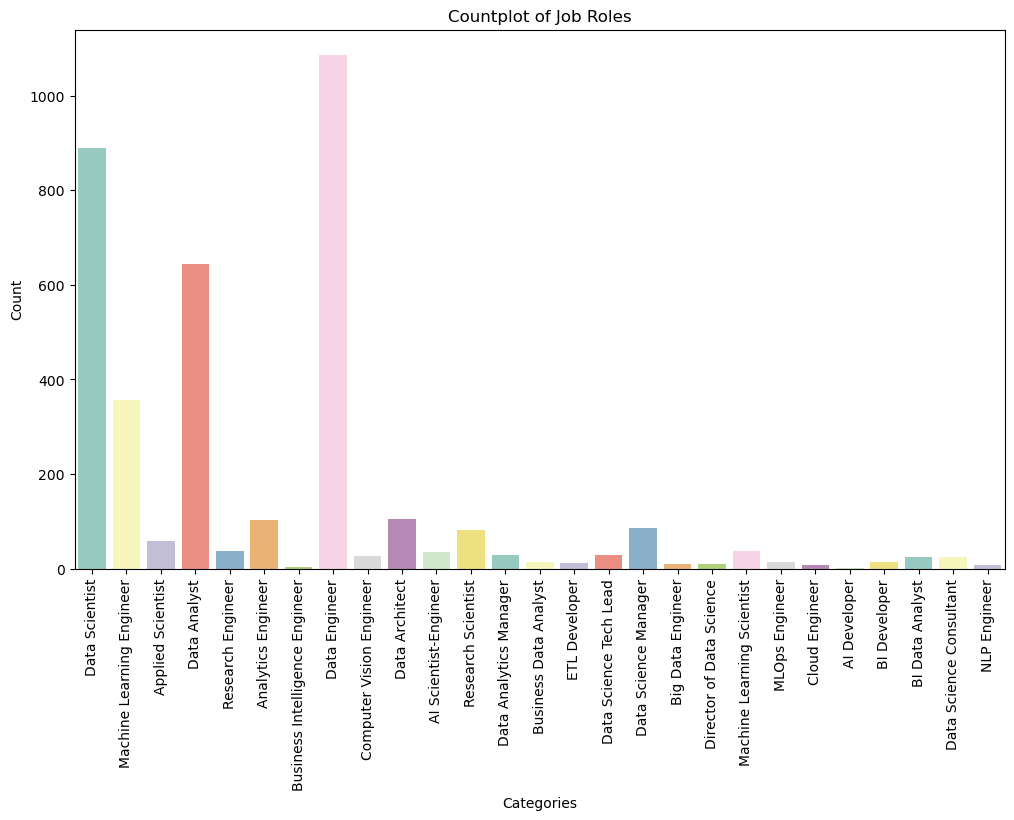

In [181]:
job_role_count = df["job_title"].value_counts()
weidth = 12
height = 7
plt.figure(figsize=(weidth,height))
sns.countplot(data=df, x='job_title', palette='Set3')


# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Countplot of Job Roles')
plt.xticks(rotation=90)

# Display the plot
plt.show()

<AxesSubplot:xlabel='job_title'>

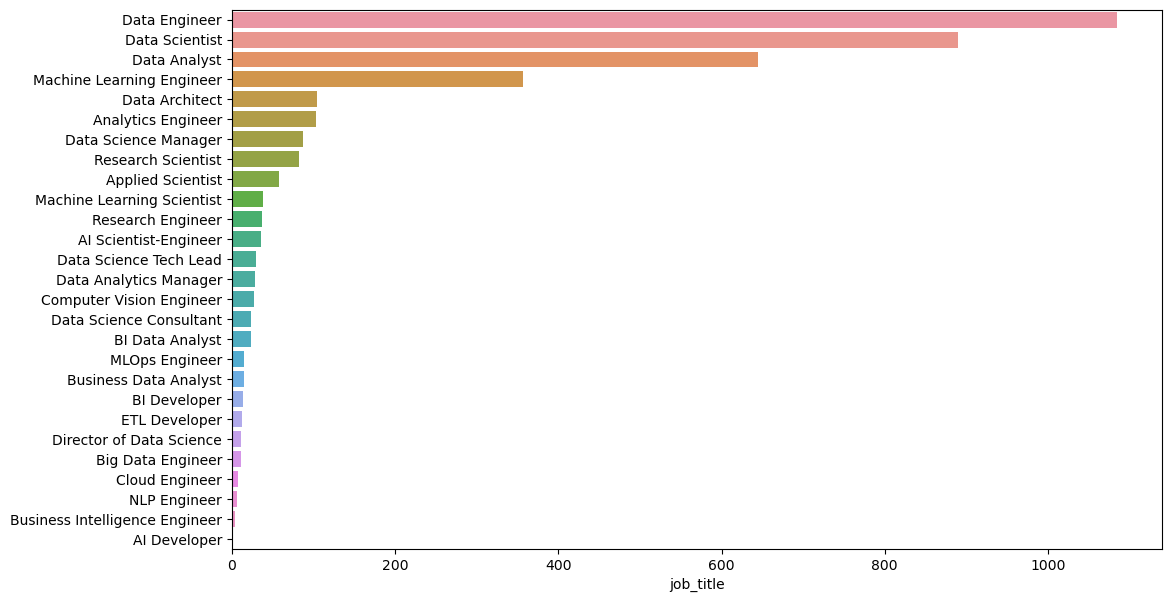

In [182]:
weidth = 12
height = 7
plt.figure(figsize=(weidth,height))

sns.barplot(job_role_count,job_role_count.index,)


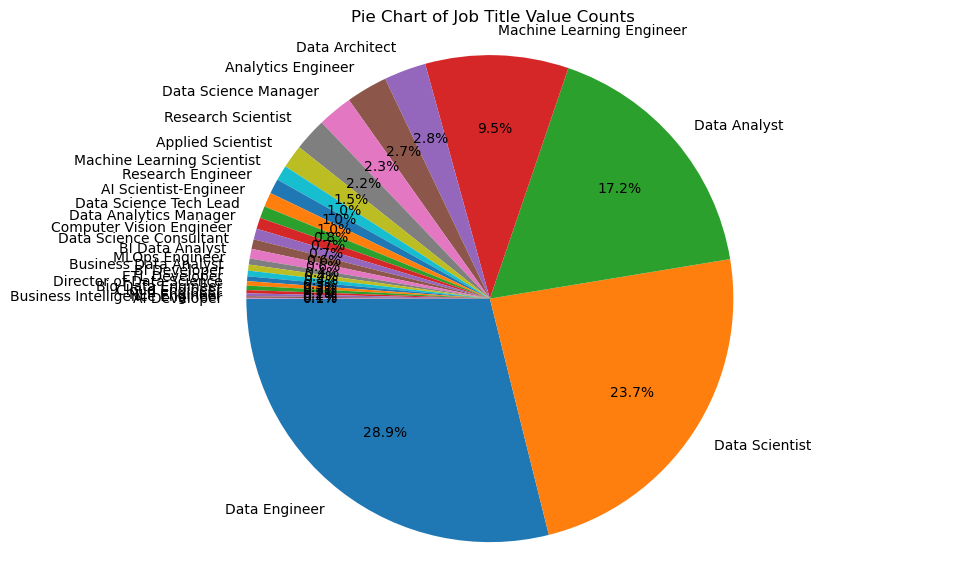

In [183]:
# Create a pie chart of Job Titile Categories
plt.figure(figsize=(weidth, height))  # Optional: Set the figure size

job_role_count = df["job_title"].value_counts()
plt.pie(job_role_count, labels=job_role_count.index, autopct='%1.1f%%', startangle=180,
    pctdistance=0.7,
    labeldistance=1.1,
    radius=2)
plt.title('Pie Chart of Job Title Value Counts')
plt.axis('equal')  
plt.show()


#### We have Most of The Job Roles Salaries who were Working in 2023, 2022

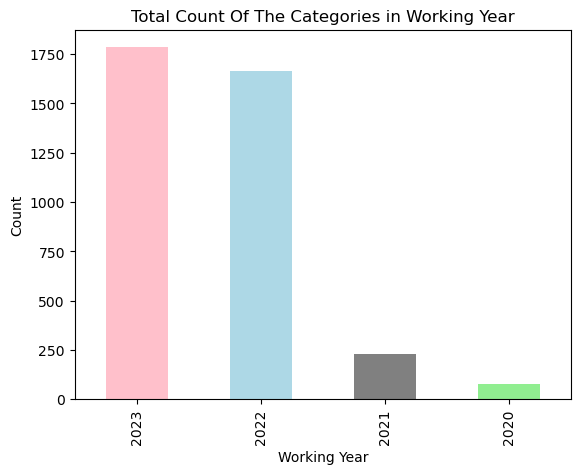

In [184]:
colors = ["pink","lightblue","grey","lightgreen"]
work_year_count = df["work_year"].value_counts()
work_year_count.plot(kind = "bar",color= colors)
plt.xlabel("Working Year")
plt.ylabel("Count")

plt.title("Total Count Of The Categories in Working Year")
plt.show()

#### Experience Level
Most have the Salaries Reported from Senior Experienced Level Employees

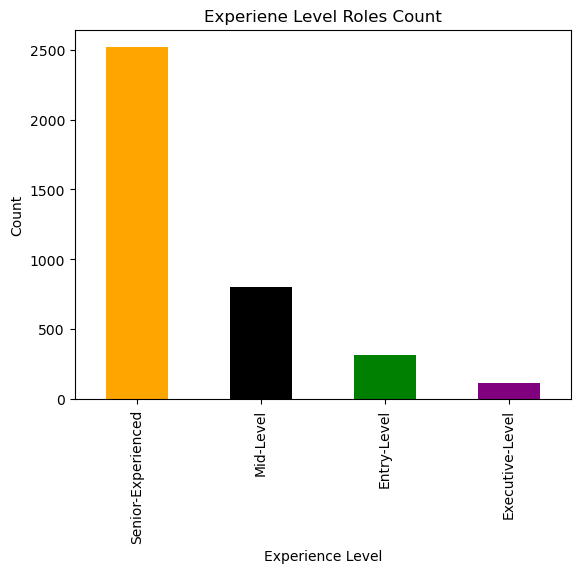

In [185]:
exp_level = df["experience_level"].value_counts()
exp_level.plot(kind = "bar", color = ["orange","black","green","Purple"])
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.title("Experiene Level Roles Count")
plt.show()

#### The Employeement Type 
almost All of The employees are Full Time workers in The Field there are about 99.0 %

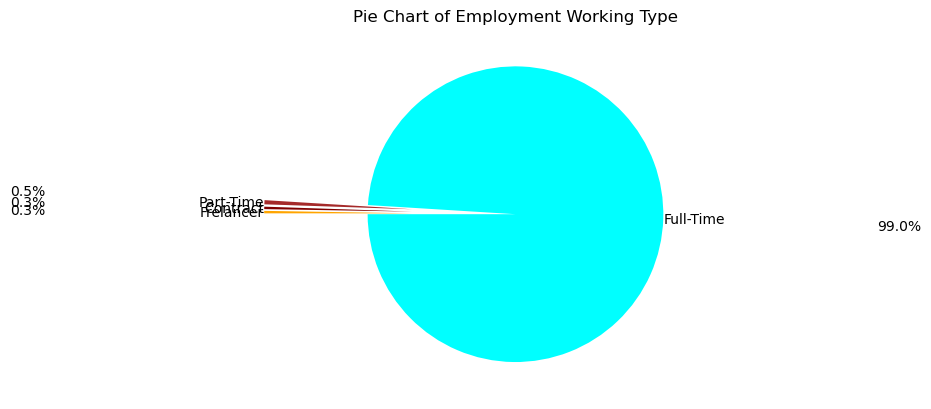

In [186]:
emp_type = df["employment_type"].value_counts()
plt.pie(emp_type, labels=emp_type.index, autopct='%1.1f%%', startangle=180,explode=[0,0.7,0.7,0.7],colors=["cyan","Brown","maroon","orange"],
    pctdistance=2.6,
    labeldistance=1,
    radius=1)

plt.title('Pie Chart of Employment Working Type')
plt.show()


In [187]:
remote_ratio_val_c = df["remote_ratio"].value_counts()

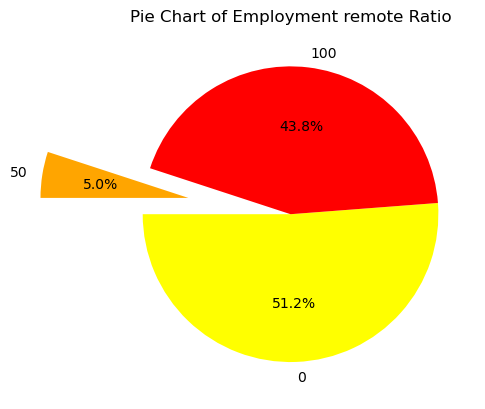

In [188]:
plt.pie(remote_ratio_val_c, labels=remote_ratio_val_c.index, autopct='%1.1f%%', startangle=180,explode=[0,0,0.7],colors=["yellow","red","orange"],
)

plt.title('Pie Chart of Employment remote Ratio')
plt.show()

 There are more than 50% Employees are remotely working and five percent employees are hybridly working 

In [189]:
comp_loc_count = df["company_location"].value_counts()

In [190]:
com_loc = comp_loc_count[comp_loc_count >= 6].index
com_loc2 = comp_loc_count[comp_loc_count < 6].index.shape[0]

com_loc3 = df[df["company_location"].isin(com_loc)]["company_location"].value_counts()

<AxesSubplot:xlabel='company_location'>

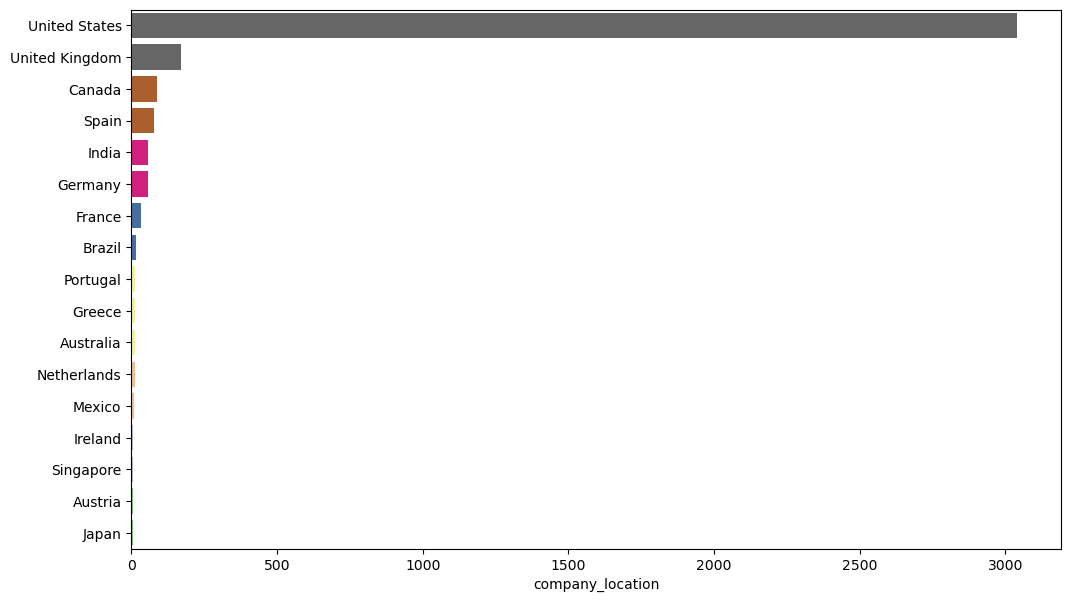

In [191]:
weidth = 12
height = 7
plt.figure(figsize=(weidth,height))

sns.barplot(com_loc3,com_loc3.index,palette="Accent_r")


In [192]:
com_size = df["company_size"].value_counts()

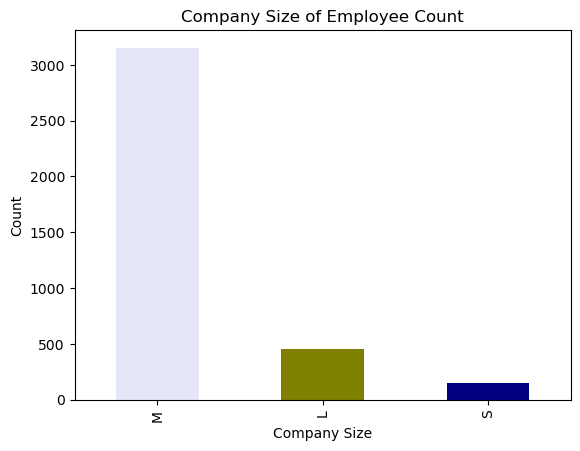

In [193]:
com_size.plot(kind = "bar", color = ["Lavender",
                                      "Olive",
                                      "Navy"])
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.title("Company Size of Employee Count")
plt.show()

 Most of The Companies Are Medium Size 

From Above Dataframe We have Got That The Highest Salary Achieved in The Year 2021 which is 423,000 $ 423k US Dollars
and 4309

In [194]:
work_year_ = df.groupby("work_year")["salary_in_usd","remote_ratio","job_title","company_location"]
w = work_year_agg = work_year_.agg({"salary_in_usd":["max","min","mean","median"]})
w #work_year_agg

salary_in_usd                          
                    max   min      mean    median
work_year                                        
2020             450000  5707  92302.63  73065.00
2021             423000  5409  94087.21  80000.00
2022             430967  5132 133338.62 131300.00
2023             423834  7000 149045.54 143860.00

From Above DataFrame 
WE Can See that The Maximum salaries in 2020,2021,2022 and 2023 are respectively 450000,423000,430967 and 423834. Its Shows Fluctuating in nature.

while Year Wise Min, Mean and Median Salaries are Growing with Year by year

we have also find out that the mininum salaries are 1 to 2% percents of the Maximum salaries 

So the Maximum Salaries Are Very High in Range

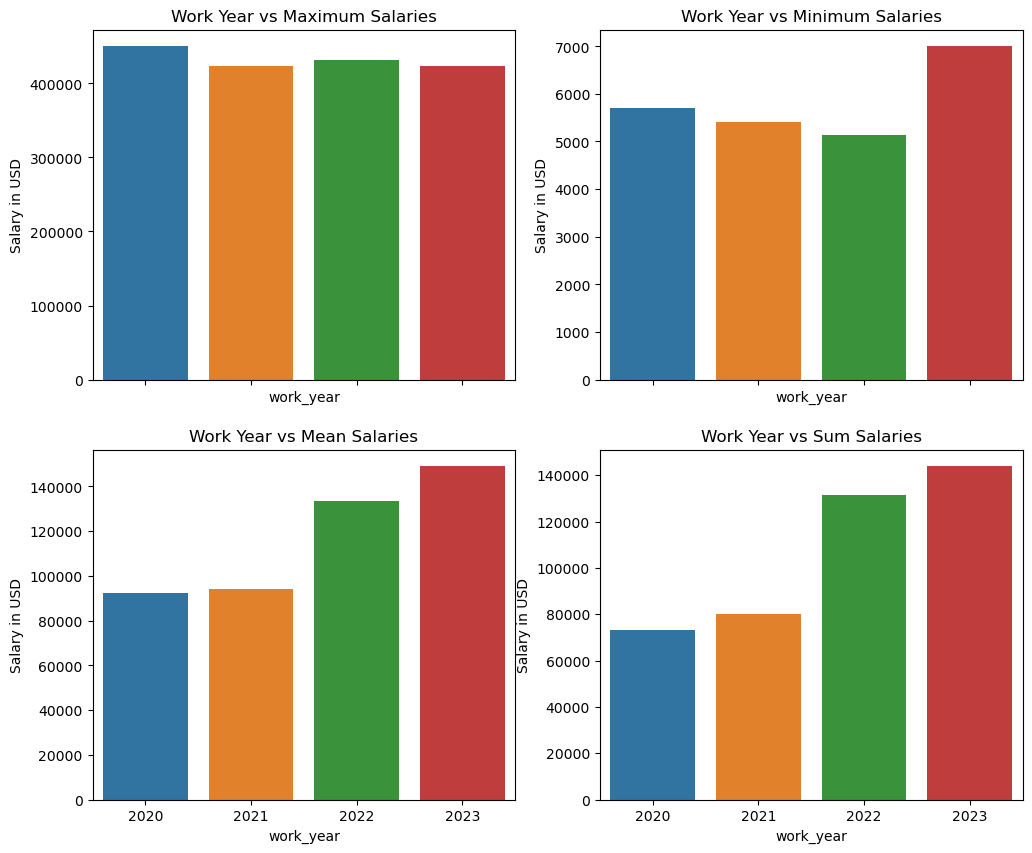

In [195]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10),sharex="all")

# Set titles for subplots
axs[0, 0].set_title('Work Year vs Maximum Salaries')
axs[0, 1].set_title('Work Year vs Minimum Salaries')
axs[1, 0].set_title('Work Year vs Mean Salaries')
axs[1, 1].set_title('Work Year vs Sum Salaries')

# Customize the layout
sns.barplot(data=w, x=w.index,y=('salary_in_usd','max'),ax=axs[0,0])
axs[0,0].set_ylabel("Salary in USD")
sns.barplot(data=w, x=w.index,y=('salary_in_usd','min'),ax=axs[0,1])
axs[0,1].set_ylabel("Salary in USD")
sns.barplot(data=w, x=w.index,y=('salary_in_usd','mean'),ax=axs[1,0])
axs[1,0].set_ylabel("Salary in USD")
sns.barplot(data=w, x=w.index,y=('salary_in_usd','median'),ax=axs[1,1])
axs[1,1].set_ylabel("Salary in USD")


fig.show()

In [202]:
exp_level_ = df.groupby("experience_level")["salary_in_usd","remote_ratio","job_title","company_location"]
e = exp_level_agg = exp_level_.agg({"salary_in_usd":["max","min","mean","median"]})
e  #exp_level_agg

salary_in_usd                           
                             max    min      mean    median
experience_level                                           
Entry-Level               300000   5409  78546.28  70000.00
Executive-Level           416000  15000 194930.93 196000.00
Mid-Level                 450000   5132 104525.94 100000.00
Senior-Experienced        423834   8000 153051.07 146000.00

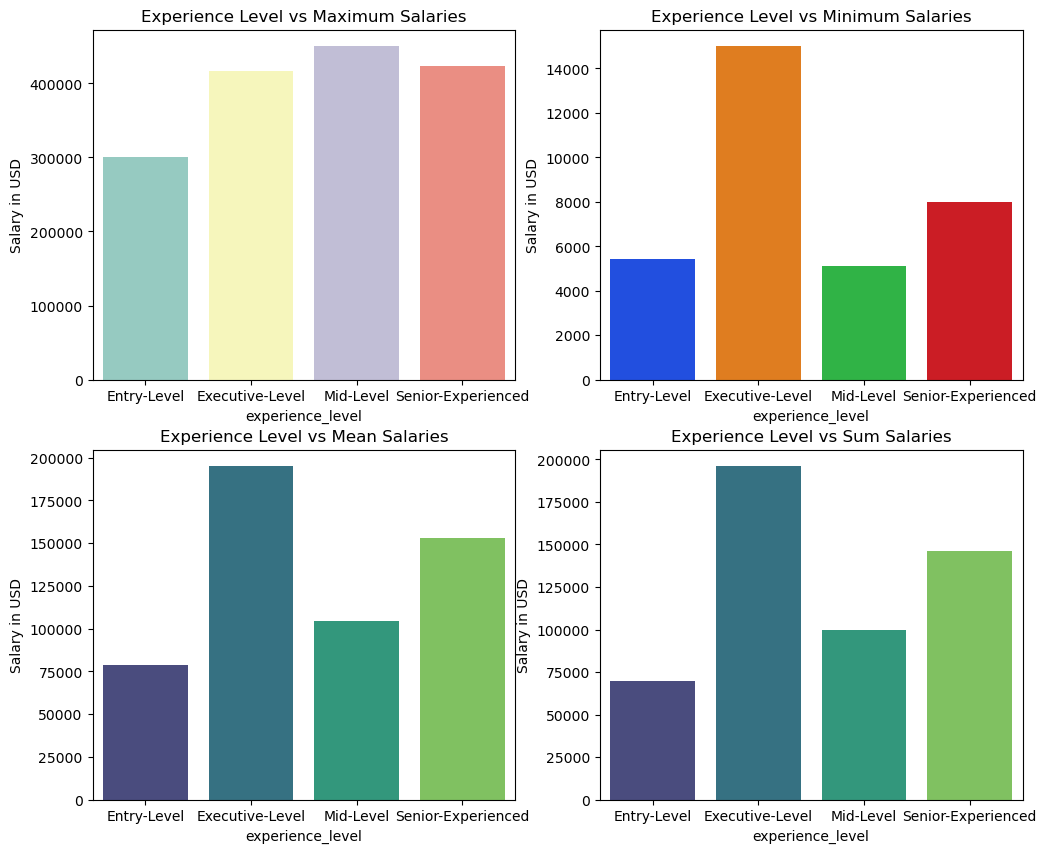

In [203]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Set titles for subplots
axs[0, 0].set_title('Experience Level vs Maximum Salaries')
axs[0, 1].set_title('Experience Level vs Minimum Salaries')
axs[1, 0].set_title('Experience Level vs Mean Salaries')
axs[1, 1].set_title('Experience Level vs Sum Salaries')


# Customize the layout
sns.barplot(data=e, x=e.index,y=('salary_in_usd','max'),ax=axs[0,0], palette= "Set3")
axs[0,0].set_ylabel("Salary in USD")
sns.barplot(data=e, x=e.index,y=('salary_in_usd','min'),ax=axs[0,1],palette="bright")
axs[0,1].set_ylabel("Salary in USD")
sns.barplot(data=e, x=e.index,y=('salary_in_usd','mean'),ax=axs[1,0],palette="viridis")
axs[1,0].set_ylabel("Salary in USD")
sns.barplot(data=e, x=e.index,y=('salary_in_usd','median'),ax=axs[1,1],palette="viridis")
axs[1,1].set_ylabel("Salary in USD")


fig.show()

Above Dataframe And Graphs shows That

The Salaries Values Are Growing as Experience Gain in Industry Entry Level To The Executive level

There is not much Difference Between Mid Level and Senior-experienced Level.

In [204]:
# colors
named_colors_combined = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w',
    'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white',
    'darkred', 'darkorange', 'darkyellow', 'darkgreen', 'darkblue', 'darkpurple', 'darkgray',
    'lightred', 'lightorange', 'lightyellow', 'lightgreen', 'lightblue', 'lightpurple', 'lightgray',
    'xkcd:aquamarine', 'xkcd:azure', 'xkcd:beige', 'xkcd:black', 'xkcd:blue', 'xkcd:bluegreen',
    'xkcd:bluegrey', 'xkcd:bordeaux', 'xkcd:brown', 'xkcd:buff', 'xkcd:burgundy', 'xkcd:burnt_siena',
    'xkcd:burnt_sienna', 'xkcd:burnt_umber', 'xkcd:charcoal', 'xkcd:chocolate', 'xkcd:coffee',
    'xkcd:cool_grey', 'xkcd:coral', 'xkcd:cyan', 'xkcd:dark_blue', 'xkcd:dark_brown', 'xkcd:dark_green',
    'xkcd:dark_grey', 'xkcd:dark_orange', 'xkcd:dark_purple', 'xkcd:dark_red', 'xkcd:dark_yellow',
    'xkcd:dusty_pink', 'xkcd:fire_engine_red', 'xkcd:forest_green', 'xkcd:gold', 'xkcd:green', 'xkcd:grey',
    'xkcd:hot_pink', 'xkcd:indigo', 'xkcd:khaki', 'xkcd:lavender', 'xkcd:light_blue', 'xkcd:light_brown',
    'xkcd:light_green', 'xkcd:light_grey', 'xkcd:light_orange', 'xkcd:light_pink', 'xkcd:light_purple',
    'xkcd:light_red', 'xkcd:light_yellow', 'xkcd:lime', 'xkcd:mauve', 'xkcd:medium_blue', 'xkcd:midnight_blue',
    'xkcd:mint', 'xkcd:mustard', 'xkcd:navy', 'xkcd:neon_blue', 'xkcd:neon_green', 'xkcd:neon_pink',
    'xkcd:neon_purple', 'xkcd:neon_red', 'xkcd:neon_yellow', 'xkcd:olive', 'xkcd:orange', 'xkcd:pea_green',
    'xkcd:pink', 'xkcd:purple', 'xkcd:red', 'xkcd:rose', 'xkcd:royal_blue', 'xkcd:royal_purple',
    'xkcd:salmon', 'xkcd:seafoam', 'xkcd:seafoam_blue', 'xkcd:seafoam_green', 'xkcd:sky_blue',
    'xkcd:spring_green', 'xkcd:tangerine', 'xkcd:taupe', 'xkcd:teal', 'xkcd:tomato', 'xkcd:turquoise',
    'xkcd:violet', 'xkcd:yellow', 'xkcd:red_orange', 'xkcd:amber', 'xkcd:scarlet', 'xkcd:green_yellow',
    'xkcd:lime_green', 'xkcd:goldenrod', 'xkcd:burnt_orange', 'xkcd:medium_green', 'xkcd:burnt_sienna',
    'xkcd:sienna', 'xkcd:barney', 'xkcd:hot_purple', 'xkcd:warm_purple', 'xkcd:bubblegum',
    'xkcd:purplish_pink', 'xkcd:purpleish_pink', 'xkcd:orange_pink', 'xkcd:reddish_orange',
    'xkcd:deep_pink', 'xkcd:light_pink', 'xkcd:pinkish_purple', 'xkcd:deep_purple', 'xkcd:light_purple',
    'xkcd:purple_pink', 'xkcd:pink_purple', 'xkcd:lime_yellow', 'xkcd:yellow_orange',
    'xkcd:reddish_pink', 'xkcd:dark_pink', 'xkcd:light_red', 'xkcd:deep_red', 'xkcd:light_orange',
    ]

seaborn_palettes = [
    "deep", "muted", "pastel", "dark", "colorblind",
    "viridis", "plasma", "inferno", "magma", "husl",
    "Set1", "Set2", "Set3", "Paired", "tab10",
    "tab20", "tab20b", "tab20c", "bright", "cubehelix",
    "light_palette", "dark_palette", "dawn", "hls", "coolwarm"
]


In [206]:
comp_loc_ = df.groupby("company_location")["salary_in_usd","remote_ratio","job_title","company_location"]
comp_loc_agg = comp_loc_.agg({"salary_in_usd":["max","min","mean","median"]})
comp_loc_agg

salary_in_usd                            
                                   max     min      mean    median
company_location                                                  
Albania                          10000   10000  10000.00  10000.00
Algeria                         100000  100000 100000.00 100000.00
American Samoa                   50000   18053  29351.00  20000.00
Argentina                        50000   12000  25000.00  13000.00
Armenia                          50000   50000  50000.00  50000.00
Australia                       171000   40000  80033.43  72525.00
Austria                          91237   50000  71354.83  68059.50
Belgium                          88654   52008  76864.75  83398.50
Bolivia                           7500    7500   7500.00   7500.00
Bosnia and Herzegovina          120000  120000 120000.00 120000.00
Brazil                           84000    6270  40579.20  42000.00
Canada                          275000   15000 131917.69 120000.00
Central African Republic         54685   42533  48609.00  48609.00
Chile                            40038   40038  40038.00  40038.00
China                           100000  100000 100000.00 100000.00
Colombia                        125000   21844  64961.00  56500.00
Costa Rica                       50000   50000  50000.00  50000.00
Croatia                         109371   45618  75967.67  72914.00
Czech Republic                   69999    5132  35200.00  30469.00
Denmark                          88654   19073  45558.00  37252.50
Egypt                            22800   22800  22800.00  22800.00
Estonia                          63312   31520  47416.00  47416.00
Finland                          75020   63040  68792.67  68318.00
France                          152000   20000  66138.74  58969.50
Germany                         275000   15966  88288.80  72721.50
Ghana                            30000    7000  18500.00  18500.00
Greece                           84053   12877  51792.50  50216.00
Honduras                         20000   20000  20000.00  20000.00
Hong Kong                        65062   65062  65062.00  65062.00
Hungary                          35735   17684  26709.50  26709.50
India                           300000    5409  30197.74  18276.00
Indonesia                        53416   15000  34208.00  34208.00
Iran                            100000  100000 100000.00 100000.00
Iraq                            100000  100000 100000.00 100000.00
Ireland                         172309   68293 114943.43 101943.00
Israel                          423834  119059 271446.50 271446.50
Italy                            68293   21669  41297.75  37614.50
Japan                           260000   41689 114127.33  75682.00
Kenya                            80000    9272  44636.00  44636.00
Latvia                           77262   38631  57946.50  57946.50
Lithuania                       110446   79178  94812.00  94812.00
Luxembourg                       62726   10000  43942.67  59102.00
Malaysia                         40000   40000  40000.00  40000.00
Malta                            28369   28369  28369.00  28369.00
Mexico                          255000   30000  97151.10  66000.00
Moldova                          18000   18000  18000.00  18000.00
Morocco                          10000   10000  10000.00  10000.00
Netherlands                     133000   42000  78738.31  73546.00
New Zealand                     125000  125000 125000.00 125000.00
Nigeria                         200000   10000  78000.00  50000.00
North Macedonia                   6304    6304   6304.00   6304.00
Pakistan                         40000    8000  20000.00  16000.00
Philippines                      50000   50000  50000.00  50000.00
Poland                          153667   28476  61342.80  44365.00
Portugal                         75116   21013  50538.71  52932.50
Puerto Rico                     200000  135000 167500.00 167500.00
Romania                          60000   53654  56827.00  56827.00
Russi

From Above Data We have Seen That highest Salaries are reported from employees of Companies of location United States about 450000 US dollar

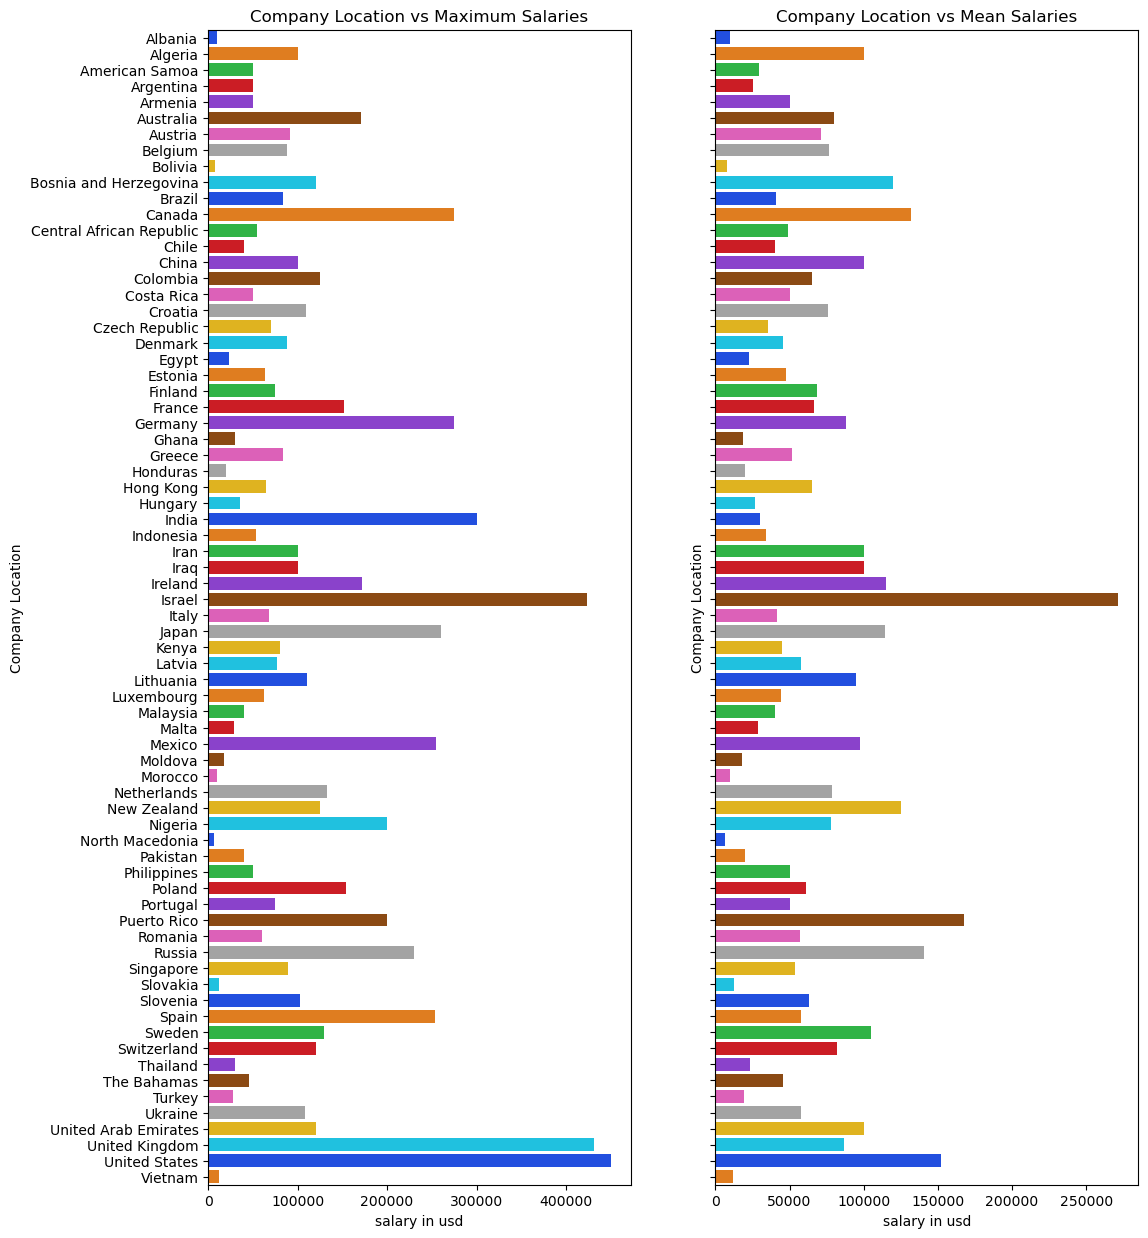

In [207]:
fig, axs = plt.subplots(1, 2, figsize=(12, 15),sharey="all")

# Set titles for subplots
axs[0].set_title('Company Location vs Maximum Salaries')
axs[1].set_title('Company Location vs Mean Salaries')


# Customize the layout
sns.barplot(data=comp_loc_agg, x=('salary_in_usd','max'),y=comp_loc_agg.index,ax=axs[0], palette= "bright")
axs[0].set_ylabel("Company Location")
axs[0].set_xlabel("salary in usd")

sns.barplot(data=comp_loc_agg, x=('salary_in_usd','mean'),y=comp_loc_agg.index,ax=axs[1], palette="bright")
axs[1].set_ylabel("Company Location")
axs[1].set_xlabel("salary in usd")



fig.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 15),sharey="all")

# Set titles for subplots
axs[0].set_title('Experience Level vs Maximum Salaries')
axs[1].set_title('Experience Level vs Mean Salaries')


# Customize the layout
sns.barplot(data=comp_loc_agg, x=('salary_in_usd','max'),y=comp_loc_agg.index,ax=axs[0], palette= "bright")
axs[0].set_ylabel("Salary in USD")
sns.barplot(data=comp_loc_agg, x=('salary_in_usd','mean'),y=comp_loc_agg.index,ax=axs[1], palette="bright")
axs[1].set_ylabel("Salary in USD")



fig.show()

In [209]:
job_role_ = df.groupby("job_title")["salary_in_usd","remote_ratio","job_title","company_location"]
job_role_agg = job_role_.agg({"salary_in_usd":["max","min","mean","median"]})
job_role_agg

salary_in_usd                            
                                         max     min      mean    median
job_title                                                               
AI Developer                           70000   40000  55000.00  55000.00
AI Scientist-Engineer                 423834    6304 113796.31  93096.50
Analytics Engineer                    289800    7500 152368.63 143860.00
Applied Scientist                     350000   72000 190264.48 191737.50
BI Data Analyst                       200000    6270  77108.42  66417.50
BI Developer                          197000    5409 120957.79 125000.00
Big Data Engineer                     161311    5882  68672.00  60000.00
Business Data Analyst                 150000    9289  66065.40  59102.00
Business Intelligence Engineer        225000  129300 174150.00 171150.00
Cloud Engineer                        190000   12608 129612.75 150000.00
Computer Vision Engineer              342810    5409 113241.93  70000.00
Data Analyst                          430967    5723 107253.05 105000.00
Data Analytics Manager                405000   17509 139173.18 140000.00
Data Architect                        376080   38154 160693.81 159500.00
Data Engineer                         324000   12000 141589.92 135000.00
Data Science Consultant               145000    5707  87011.75  90000.00
Data Science Manager                  300000   45600 166390.30 158000.00
Data Science Tech Lead                375000   31520 177819.17 170037.50
Data Scientist                        416000    5679 139996.20 141525.00
Director of Data Science              353200   57786 195140.73 168000.00
ETL Developer                         250000   52533 121443.75  74033.00
MLOps Engineer                        205920   50180 139275.33 134000.00
Machine Learning Engineer             375000   10000 151419.57 148500.00
Machine Learning Scientist            423000   12000 146240.95 151500.00
NLP Engineer                          275000    5132 132785.29 135000.00
Research Engineer                     293000   60000 163108.38 155000.00
Research Scientist                    450000   23000 161214.20 150000.00

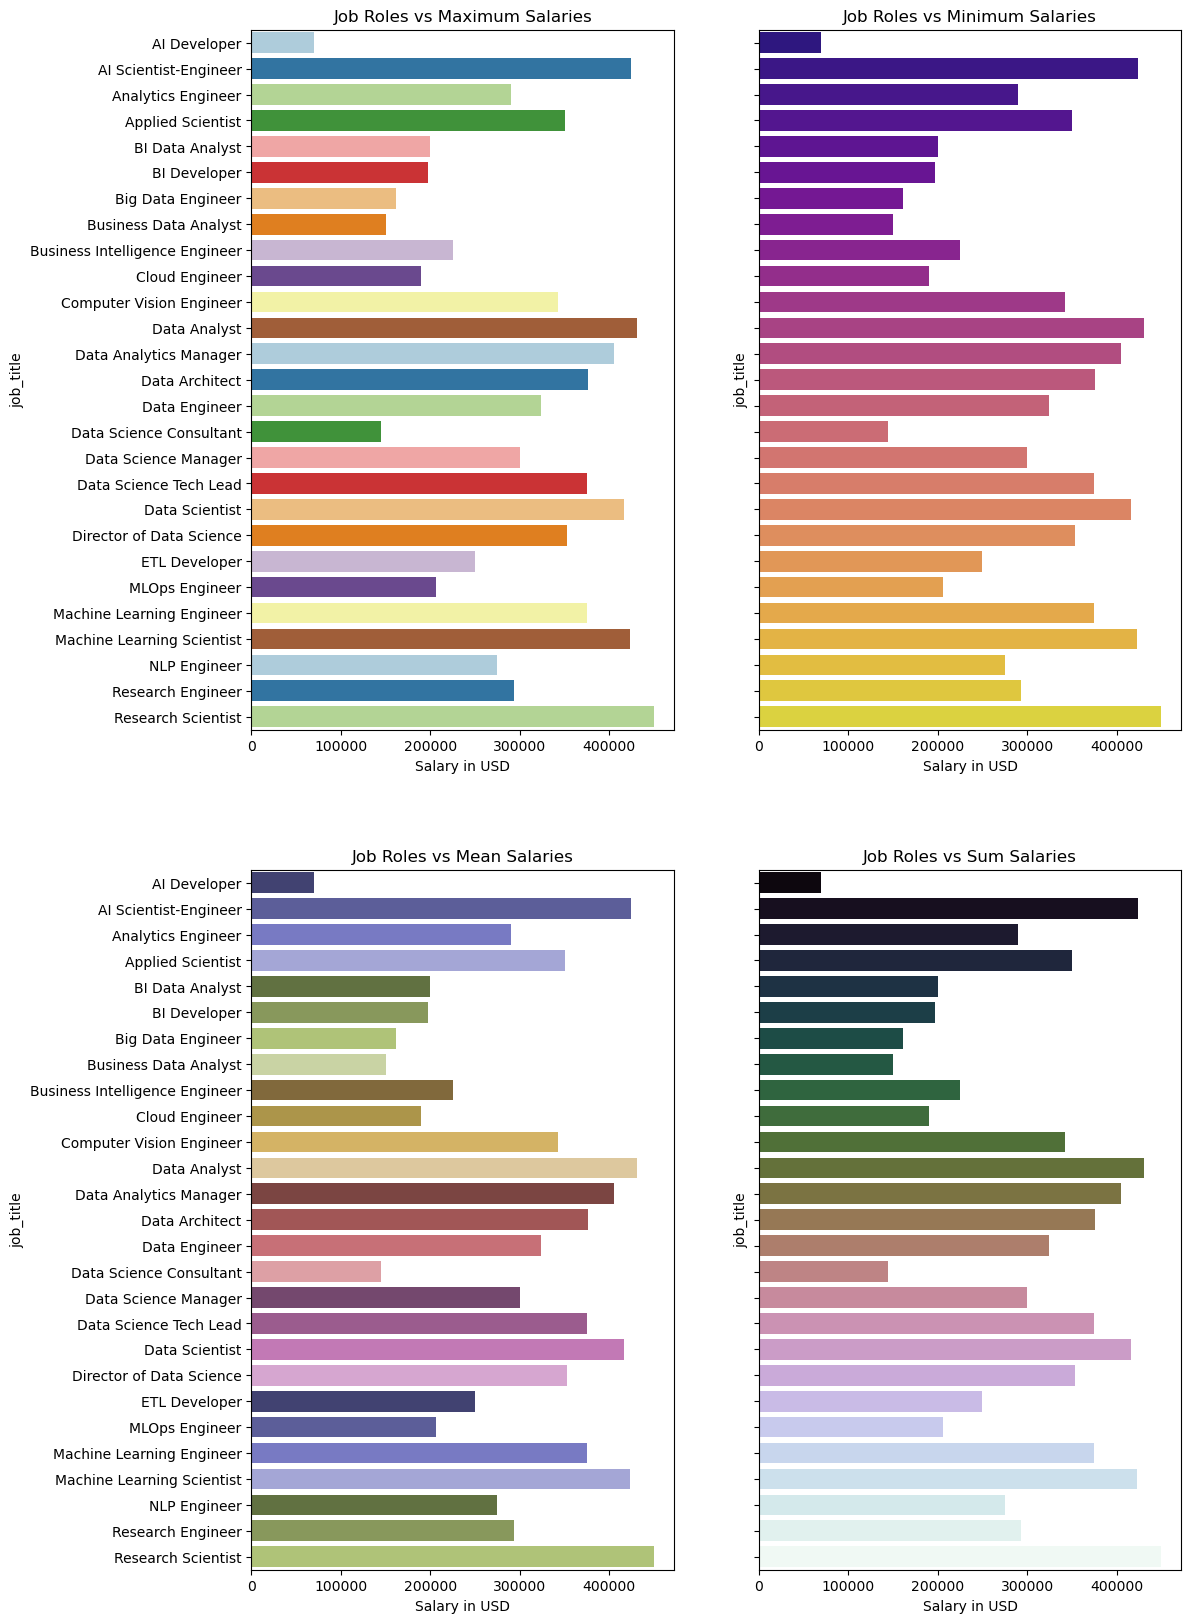

In [210]:
fig, axs = plt.subplots(2, 2, figsize=(12, 20),sharey="all")

# Set titles for subplots
axs[0, 0].set_title('Job Roles vs Maximum Salaries')
axs[0, 1].set_title('Job Roles vs Minimum Salaries')
axs[1, 0].set_title('Job Roles vs Mean Salaries')
axs[1, 1].set_title('Job Roles vs Sum Salaries')


# Customize the layout
sns.barplot(data=job_role_agg, x=('salary_in_usd','max'),y=job_role_agg.index,ax=axs[0,0], palette= "Paired")
axs[0,0].set_xlabel("Salary in USD")
sns.barplot(data=job_role_agg, x=('salary_in_usd','max'),y=job_role_agg.index,ax=axs[0,1],palette="plasma")
axs[0,1].set_xlabel("Salary in USD")
sns.barplot(data=job_role_agg, x=('salary_in_usd','max'),y=job_role_agg.index,ax=axs[1,0],palette="tab20b")
axs[1,0].set_xlabel("Salary in USD")
sns.barplot(data=job_role_agg, x=('salary_in_usd','max'),y=job_role_agg.index,ax=axs[1,1],palette="cubehelix")
axs[1,1].set_xlabel("Salary in USD")


fig.show()

From Above Operations Highest , Minimum and Mean Salary Job Roles Above 400000 Are
Research Scientist, Data Analyst, Director of Data Science, Data Scientist, AI scientist Engineer , Machine Learning Engineer

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

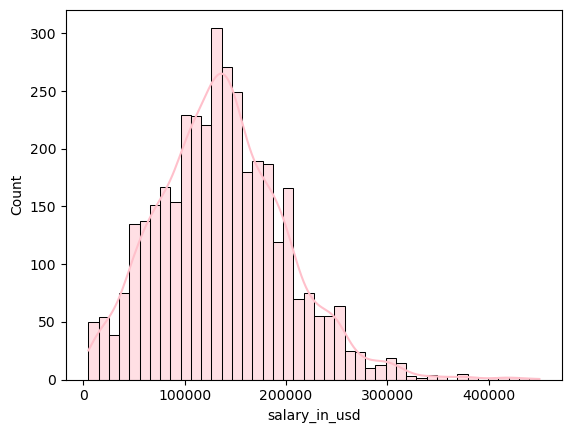

In [211]:
sns.histplot(data=df,x="salary_in_usd", kde=True,color=["pink"])

Most of The Values are between salary range of 0 to 300000

In [212]:
print("Max Salary : ",df["salary_in_usd"].max())
print("Min Salary : ",df["salary_in_usd"].min())

Max Salary :  450000
Min Salary :  5132


In [213]:
# Creating The dictionary for the Replacing The categories in work year with Numerical Values
c = []
for i in range(450000,0,-1000):
    a = df[df["salary_in_usd"] >= i]["work_year"].values
    c.append(a)

d = []
for i in c:
    d.append(i)

e = pd.Series(d)

work_year_list = []
for i in e:

    
    for j in i:
        if j not in work_year_list:
            work_year_list.append(j)
            
work_year_list

z = np.array([i for i in range(len(work_year_list)-1,-1,-1)])

work_year_dict = {}

for i in range(len(work_year_list)):
    work_year_dict[work_year_list[i]] = z[i]

In [214]:
# Creating The dictionary for the Replacing The categories in experience level with Numerical Values

c = []
for i in range(450000,0,-1000):
    a = df[df["salary_in_usd"] >= i]["experience_level"].values
    c.append(a)

d = []
for i in c:
    d.append(i)

e = pd.Series(d)

exp_level_list = []
for i in e:

    
    for j in i:
        if j not in exp_level_list:
            exp_level_list.append(j)
            
exp_level_list

z = np.array([i for i in range(len(exp_level_list)-1,-1,-1)])

exp_level_dict = {}

for i in range(len(exp_level_list)):
    exp_level_dict[exp_level_list[i]] = z[i]
    
exp_level_dict

{'Mid-Level': 3,
 'Senior-Experienced': 2,
 'Executive-Level': 1,
 'Entry-Level': 0}

In [215]:
# Creating The dictionary for the Replacing The categories in employment type with Numerical Values

c = []
for i in range(450000,0,-1000):
    a = df[df["salary_in_usd"] >= i]["employment_type"].values
    c.append(a)

d = []
for i in c:
    d.append(i)

e = pd.Series(d)

employment_type_list = []
for i in e:

    
    for j in i:
        if j not in employment_type_list:
            employment_type_list.append(j)
            
employment_type_list

z = np.array([i for i in range(len(employment_type_list)-1,-1,-1)])

employment_type_dict = {}

for i in range(len(employment_type_list)):
    employment_type_dict[employment_type_list[i]] = z[i]
    

In [219]:
# Creating The dictionary for the Replacing The categories in job title with Numerical Values

c = []
for i in range(450000,0,-1000):
    a = df[df["salary_in_usd"] >= i]["job_title"].values
    c.append(a)

d = []
for i in c:
    d.append(i)

e = pd.Series(d)

job_title_list = []
for i in e:

    
    for j in i:
        if j not in job_title_list:
            job_title_list.append(j)
            
job_title_list

# z = np.array([i for i in range(len(job_title_list)-1,-1,-1)])
z = np.array([i for i in range(0,len(job_title_list))])

job_title_dict = {}

for i in range(len(job_title_list)):
    job_title_dict[job_title_list[i]] = z[i]
    
job_title_dict

{'Research Scientist': 0,
 'Data Analyst': 1,
 'AI Scientist-Engineer': 2,
 'Machine Learning Scientist': 3,
 'Data Scientist': 4,
 'Data Analytics Manager': 5,
 'Data Architect': 6,
 'Machine Learning Engineer': 7,
 'Data Science Tech Lead': 8,
 'Director of Data Science': 9,
 'Applied Scientist': 10,
 'Computer Vision Engineer': 11,
 'Data Engineer': 12,
 'Data Science Manager': 13,
 'Research Engineer': 14,
 'Analytics Engineer': 15,
 'NLP Engineer': 16,
 'ETL Developer': 17,
 'Business Intelligence Engineer': 18,
 'MLOps Engineer': 19,
 'BI Data Analyst': 20,
 'BI Developer': 21,
 'Cloud Engineer': 22,
 'Big Data Engineer': 23,
 'Business Data Analyst': 24,
 'Data Science Consultant': 25,
 'AI Developer': 26}

In [220]:
# Creating The dictionary for the Replacing The categories in company location with Numerical Values

c = []
for i in range(450000,0,-1000):
    a = df[df["salary_in_usd"] >= i]["company_location"].values
    c.append(a)

d = []
for i in c:
    d.append(i)

e = pd.Series(d)

company_location_list = []
for i in e:

    
    for j in i:
        if j not in company_location_list:
            company_location_list.append(j)
            
company_location_list

z = np.array([i for i in range(len(company_location_list)-1,-1,-1)])

company_location_dict = {}

for i in range(len(company_location_list)):
    company_location_dict[company_location_list[i]] = z[i]
    


In [221]:
# Creating The dictionary for the Replacing The categories in company size with Numerical Values

c = []
for i in range(450000,0,-1000):
    a = df[df["salary_in_usd"] >= i]["company_size"].values
    c.append(a)

d = []
for i in c:
    d.append(i)

e = pd.Series(d)

company_size_list = []
for i in e:

    
    for j in i:
        if j not in company_size_list:
            company_size_list.append(j)
            
company_size_list

z = np.array([i for i in range(len(company_size_list)-1,-1,-1)])

company_size_dict = {}

for i in range(len(company_size_list)):
    company_size_dict[company_size_list[i]] = z[i]
    

In [222]:
df.drop(columns=["salary_currency"],inplace=True)

In [223]:
exp_dict = {'Mid-Level': 1,
 'Senior-Experienced': 2,
 'Executive-Level':3,
 'Entry-Level': 0}

In [224]:
# Replace values in multiple columns
replacement_dict = {'experience_level': exp_dict, 'employment_type': employment_type_dict,"job_title":job_title_dict,
                   "company_location": company_location_dict,"company_size":company_size_dict}
df.replace(replacement_dict, inplace=True)


In [225]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,2,3,4,85847,100,63,1
1,2023,1,2,7,30000,100,71,0
2,2023,1,2,7,25500,100,71,0
3,2023,2,3,4,175000,100,66,2
4,2023,2,3,4,120000,100,66,2


In [226]:
relational_dataframe = df.corr()
relational_dataframe

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
work_year,1.00,0.19,0.11,-0.03,0.23,-0.24,0.22,0.42
experience_level,0.19,1.00,0.13,0.04,0.44,-0.04,0.24,0.27
employment_type,0.11,0.13,1.00,0.01,0.12,-0.06,0.12,0.15
job_title,-0.03,0.04,0.01,1.00,0.07,-0.00,-0.03,0.01
salary_in_usd,0.23,0.44,0.12,0.07,1.00,-0.06,0.37,0.23
remote_ratio,-0.24,-0.04,-0.06,-0.00,-0.06,1.00,-0.07,-0.16
company_location,0.22,0.24,0.12,-0.03,0.37,-0.07,1.00,0.29
company_size,0.42,0.27,0.15,0.01,0.23,-0.16,0.29,1.00


In [227]:
relational_dataframe["salary_in_usd"].sort_values(ascending=False)

salary_in_usd       1.00
experience_level    0.44
company_location    0.37
work_year           0.23
company_size        0.23
employment_type     0.12
job_title           0.07
remote_ratio       -0.06
Name: salary_in_usd, dtype: float64

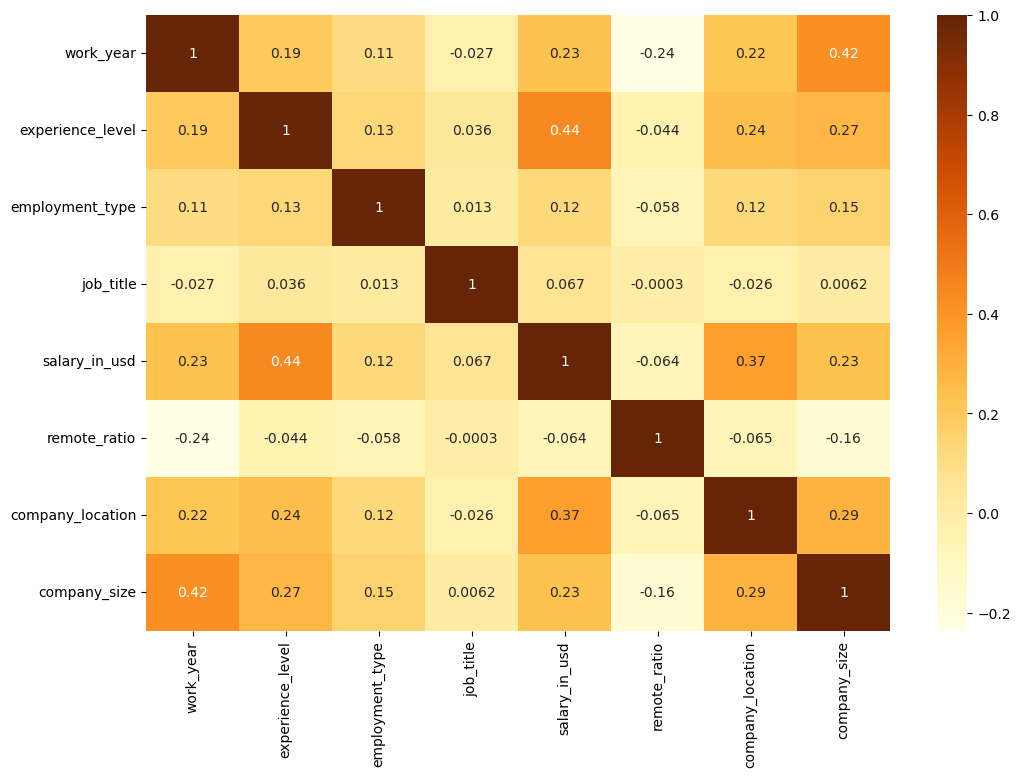

In [233]:
plt.figure(figsize=(12,8))
sns.heatmap(data=relational_dataframe,annot=True,cmap="YlOrBr")
plt.show()

#### Here, We Seen That The Relation Between Salaries And Other Features 

#### Almost All Features are Proportional to The Salary Hike Excluding Remote Ratio

#### Full Time Employees Earns More as compare to others

#### The Experience Level And Company Location Are Important Features for Salary Hikes 


In [234]:
exchange_rate_with_in_rupee = 83.90

In [262]:
df_data_sci.sort_values("salary_in_usd",ascending=False)[["experience_level","employment_type","job_title","remote_ratio","company_location","salary_in_usd"]]

,experience_level,employment_type,job_title,remote_ratio,company_location,salary_in_usd
3522,Mid-Level,Full-Time,Research Scientist,0,United States,450000
2011,Mid-Level,Full-Time,Data Analyst,0,United Kingdom,430967
528,Senior-Experienced,Full-Time,AI Scientist,0,Israel,423834
3747,Mid-Level,Full-Time,Applied Machine Learning Scientist,50,United States,423000
3675,Executive-Level,Contract,Principal Data Scientist,100,United States,416000
3750,Senior-Experienced,Full-Time,Data Scientist,100,United States,412000
3463,Senior-Experienced,Full-Time,Data Analytics Lead,100,United States,405000
1288,Senior-Experienced,Full-Time,Data Analyst,0,United States,385000
3468,Senior-Experienced,Full-Time,Applied Data Scientist,100,United States,380000
649,Senior-Experienced,Full-Time,Data Architect,100,United States,376080
